In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ***EDA***

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
netflix=pd.read_csv('/content/drive/MyDrive/netflix/combined_data_1.txt',header=None , names=["Cust_Id" , "Rating"] , usecols=[0,1])
netflix

,Cust_Id,Rating
0,1:,NaN
1,1488844,3.0
2,822109,5.0
3,885013,4.0
4,30878,4.0
...,...,...
24058258,2591364,2.0
24058259,1791000,2.0
24058260,512536,5.0
24058261,988963,3.0


In [ ]:
netflix.isnull().sum()

,0
Cust_Id,0
Rating,4499


In [ ]:
movie_count=netflix.isnull().sum()
movie_count=movie_count['Rating']
movie_count

4499

In [ ]:
total_count=netflix['Cust_Id'].nunique()
total_count

475257

In [ ]:
customer_count=total_count-movie_count
customer_count

470758

In [ ]:
rating_count=netflix['Cust_Id'].count()-movie_count
rating_count

24053764

In [ ]:
stars=netflix.groupby('Rating')['Rating'].agg(['count'])
stars

,count
Rating,
1.0,1118186
2.0,2439073
3.0,6904181
4.0,8085741
5.0,5506583


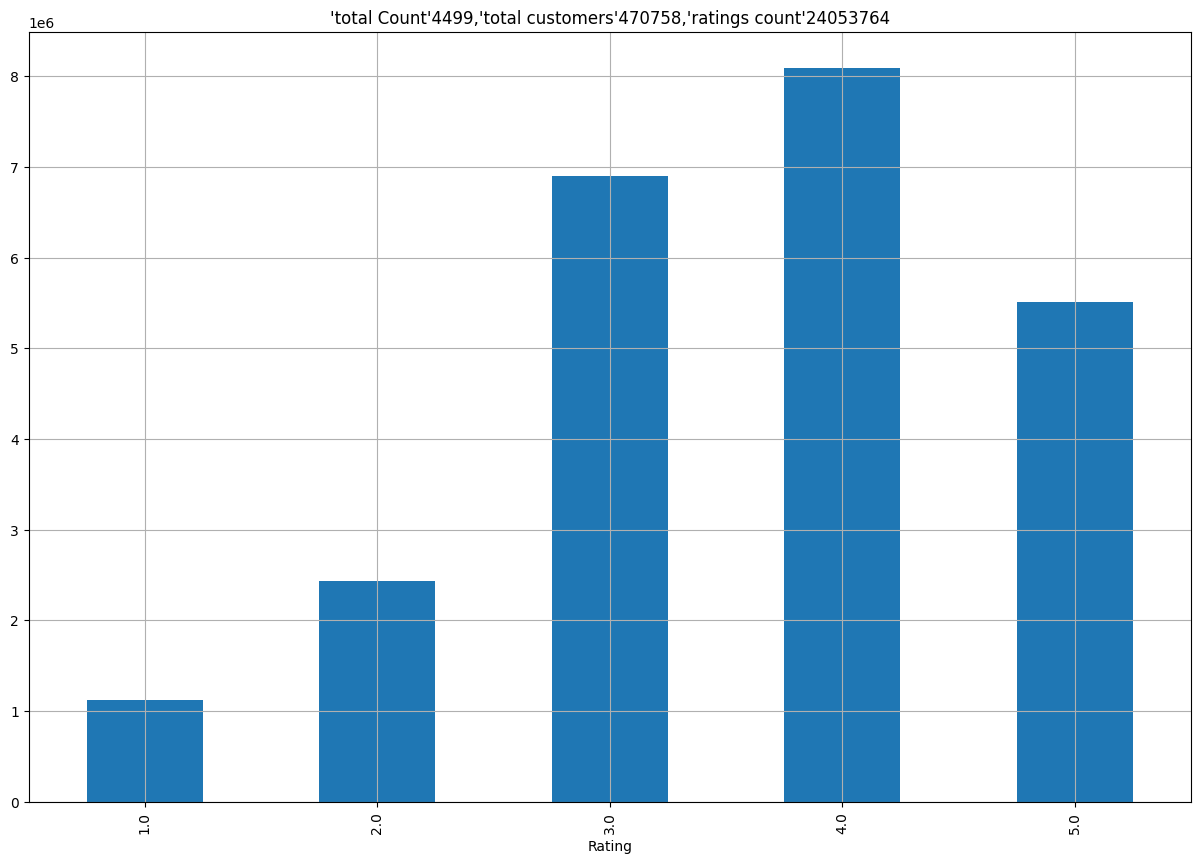

In [ ]:
ax=stars.plot(kind='bar',legend=False,figsize=(15,10))
plt.title(f"'total Count'{movie_count},'total customers'{customer_count},'ratings count'{rating_count}")
plt.grid(True)
plt.show()

In [ ]:
movie_id=None
movie_np=[]
for i in netflix['Cust_Id']:
  if':' in i:
    movie_id=int(i.replace(':',''))
  movie_np.append(movie_id)

In [ ]:
len(movie_np)

24058263

In [ ]:
netflix['Movie_Id']= movie_np

In [ ]:
netflix

,Cust_Id,Rating,Movie_Id
0,1:,NaN,1
1,1488844,3.0,1
2,822109,5.0,1
3,885013,4.0,1
4,30878,4.0,1
...,...,...,...
24058258,2591364,2.0,4499
24058259,1791000,2.0,4499
24058260,512536,5.0,4499
24058261,988963,3.0,4499


In [ ]:
netflix = netflix[netflix["Rating"].notna()]

In [ ]:
netflix

,Cust_Id,Rating,Movie_Id
1,1488844,3.0,1
2,822109,5.0,1
3,885013,4.0,1
4,30878,4.0,1
5,823519,3.0,1
...,...,...,...
24058258,2591364,2.0,4499
24058259,1791000,2.0,4499
24058260,512536,5.0,4499
24058261,988963,3.0,4499


In [ ]:
netflix.info()

<class 'pandas.core.frame.DataFrame'>
Index: 24053764 entries, 1 to 24058262
Data columns (total 3 columns):
 #   Column    Dtype  
---  ------    -----  
 0   Cust_Id   object 
 1   Rating    float64
 2   Movie_Id  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 734.1+ MB


In [ ]:
netflix['Cust_Id']=netflix['Cust_Id'].astype('int')

<ipython-input-21-6e1c13d555ae>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  netflix['Cust_Id']=netflix['Cust_Id'].astype('int')


In [ ]:
netflix.info()

<class 'pandas.core.frame.DataFrame'>
Index: 24053764 entries, 1 to 24058262
Data columns (total 3 columns):
 #   Column    Dtype  
---  ------    -----  
 0   Cust_Id   int64  
 1   Rating    float64
 2   Movie_Id  int64  
dtypes: float64(1), int64(2)
memory usage: 734.1 MB


In [ ]:
data_movie_sum=netflix.groupby('Movie_Id')['Rating'].agg(['count'])
data_movie_sum

,count
Movie_Id,
1,547
2,145
3,2012
4,142
5,1140
...,...
4495,614
4496,9519
4497,714


In [ ]:
#pre - filtering
#now we will create a filterof benchmark for movies
movie_bench=round(data_movie_sum['count'].quantile(0.6),0)
movie_bench

908.0

In [ ]:
drop_movie=data_movie_sum[data_movie_sum['count']<movie_bench].index
drop_movie

Index([   1,    2,    4,    7,    9,   10,   11,   12,   13,   14,
       ...
       4480, 4481, 4486, 4487, 4491, 4494, 4495, 4497, 4498, 4499],
      dtype='int64', name='Movie_Id', length=2699)

In [ ]:
dataset_cust_summary = netflix.groupby("Cust_Id")["Rating"].agg(["count"])

In [ ]:
dataset_cust_summary

,count
Cust_Id,
6,153
7,195
8,21
10,49
25,4
...,...
2649404,12
2649409,10
2649421,3


In [ ]:
cust_benchmark = round(dataset_cust_summary["count"].quantile(0.6),0)
cust_benchmark

36.0

In [ ]:
drop_cust_list = dataset_cust_summary[dataset_cust_summary["count"] < cust_benchmark].index

In [ ]:
len(drop_cust_list)

282042

In [ ]:
netflix= netflix[~netflix["Movie_Id"].isin(drop_movie)]
netflix = netflix[~netflix["Cust_Id"].isin(drop_cust_list)]

# ***Model Building***

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/netflix/Copy of movie_titles.csv',encoding='ISO-8859-1',header=None,names=['Movie_Id','Year','Name'],usecols=[0,1,2])
df

,Movie_Id,Year,Name
0,1,2003.0,Dinosaur Planet
1,2,2004.0,Isle of Man TT 2004 Review
2,3,1997.0,Character
3,4,1994.0,Paula Abdul's Get Up & Dance
4,5,2004.0,The Rise and Fall of ECW
...,...,...,...
17765,17766,2002.0,Where the Wild Things Are and Other Maurice Se...
17766,17767,2004.0,Fidel Castro: American Experience
17767,17768,2000.0,Epoch
17768,17769,2003.0,The Company


In [ ]:
!pip install scikit-surprise

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.4/154.4 kB 3.4 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.4-cp311-cp311-linux_x86_64.whl size=2505180 sha256=b1008edddd22435d97746eccfc90cc996d0f13fc338edb7e7aa276cc8148031e
  Stored in directory: /root/.cache/pip/wheels/2a/8f/6e/7e2899163e2d85d8266daab4aa1cdabec7a6c56f83c015b5af
Successfully built scikit-surprise


In [ ]:
from surprise import Reader, Dataset , SVD
from surprise.model_selection import cross_validate

In [ ]:
reader=Reader()

In [ ]:
data=Dataset.load_from_df(netflix[['Cust_Id','Movie_Id','Rating']][:100000],reader)
data

In [ ]:
model=SVD()

In [ ]:
cross_validate(model,data,measures=['RMSE'],cv=3)

{'test_rmse': array([1.01853137, 1.02237994, 1.01687418]),
 'fit_time': (2.1541879177093506, 1.5337483882904053, 2.446868896484375),
 'test_time': (0.29082489013671875, 0.253817081451416, 8.15737247467041)}

In [ ]:
user_rating=netflix[netflix["Cust_Id"] == 1331154]

In [ ]:
user_rating

,Cust_Id,Rating,Movie_Id
697,1331154,4.0,3
5178,1331154,4.0,8
31460,1331154,3.0,18
92840,1331154,4.0,30
224761,1331154,3.0,44
...,...,...,...
23439584,1331154,4.0,4389
23546489,1331154,2.0,4402
23649431,1331154,4.0,4432
23844441,1331154,3.0,4472


In [ ]:
user_1331154 = df.copy()

In [ ]:
user_1331154

,Movie_Id,Year,Name
0,1,2003.0,Dinosaur Planet
1,2,2004.0,Isle of Man TT 2004 Review
2,3,1997.0,Character
3,4,1994.0,Paula Abdul's Get Up & Dance
4,5,2004.0,The Rise and Fall of ECW
...,...,...,...
17765,17766,2002.0,Where the Wild Things Are and Other Maurice Se...
17766,17767,2004.0,Fidel Castro: American Experience
17767,17768,2000.0,Epoch
17768,17769,2003.0,The Company


In [ ]:
# now we are removing the movies which got less ratings basically which are there in the drop movie list
user_1331154 = user_1331154[~user_1331154["Movie_Id"].isin(drop_movie)]

In [ ]:
user_1331154

,Movie_Id,Year,Name
2,3,1997.0,Character
4,5,2004.0,The Rise and Fall of ECW
5,6,1997.0,Sick
7,8,2004.0,What the #$*! Do We Know!?
15,16,1996.0,Screamers
...,...,...,...
17765,17766,2002.0,Where the Wild Things Are and Other Maurice Se...
17766,17767,2004.0,Fidel Castro: American Experience
17767,17768,2000.0,Epoch
17768,17769,2003.0,The Company


In [ ]:
user_1331154['Estimated Score']=user_1331154['Movie_Id'].apply(lambda x: model.predict (1331154,x).est)

<ipython-input-55-7c6ba0662c70>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_1331154['Estimated Score']=user_1331154['Movie_Id'].apply(lambda x: model.predict (1331154,x).est)


In [ ]:
user_1331154

,Movie_Id,Year,Name,Estimated Score
2,3,1997.0,Character,3.597145
4,5,2004.0,The Rise and Fall of ECW,3.877590
5,6,1997.0,Sick,3.292727
7,8,2004.0,What the #$*! Do We Know!?,3.796217
15,16,1996.0,Screamers,3.385706
...,...,...,...,...
17765,17766,2002.0,Where the Wild Things Are and Other Maurice Se...,3.655872
17766,17767,2004.0,Fidel Castro: American Experience,3.655872
17767,17768,2000.0,Epoch,3.655872
17768,17769,2003.0,The Company,3.655872


In [ ]:
user_1331154.sort_values("Estimated Score",ascending = False)

,Movie_Id,Year,Name,Estimated Score
24,25,1997.0,Inspector Morse 31: Death Is Now My Neighbour,3.893689
4,5,2004.0,The Rise and Fall of ECW,3.877590
17,18,1994.0,Immortal Beloved,3.820045
7,8,2004.0,What the #$*! Do We Know!?,3.796217
29,30,2003.0,Something's Gotta Give,3.788623
...,...,...,...,...
15,16,1996.0,Screamers,3.385706
5,6,1997.0,Sick,3.292727
16,17,2005.0,7 Seconds,3.258402
23,24,1981.0,My Bloody Valentine,3.048453
